# SPACE MISSIONS DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
%matplotlib inline

In [120]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

In [3]:
df = pd.read_csv("datasets/Space_Corrected.csv")

In [153]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Year,Country
0,SpaceX,Kennedy Space Center Florida USA,2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020,USA
1,CASC,Site 9401 (SLS-2) Jiuquan Satellite Launch Ce...,2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,Boca Chica Texas USA,2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA
3,Roscosmos,Site 200/39 Baikonur Cosmodrome Kazakhstan,2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020,Kazakhstan
4,ULA,Cape Canaveral AFS Florida USA,2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020,USA


# Exploration du dataset

In [39]:
df.columns

Index(['Company Name', 'Location', 'Datum', 'Detail', 'Status Rocket',
       ' Rocket', 'Status Mission', 'Year'],
      dtype='object')

In [151]:
df["Location"].value_counts()

Site 31/6, Baikonur Cosmodrome, Kazakhstan                 235
Site 132/1, Plesetsk Cosmodrome, Russia                    216
Site 43/4, Plesetsk Cosmodrome, Russia                     202
Site 41/1, Plesetsk Cosmodrome, Russia                     198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                  193
                                                          ... 
Cosmic Girl, Mojave Air and Space Port, California, USA      1
LP-41, Kauai, Pacific Missile Range Facility                 1
Xichang Satellite Launch Center, China                       1
Site 131/29, Baikonur Cosmodrome, Kazakhstan                 1
LC-11, Cape Canaveral AFS, Florida, USA                      1
Name: Location, Length: 137, dtype: int64

# Refactor et clean

In [5]:
df = df.iloc[:,2:]

In [10]:
df["Datum"] = pd.to_datetime(df["Datum"], utc=True)

In [52]:
df["Country"] = df["Location"].apply(lambda x: x.split()[-1])

In [152]:
df["Location"] = df["Location"].apply(lambda x: " ".join(x.split(',')[-3:]))

# Top 5 des sites les plus actifs

In [169]:
df.groupby("Location")[" Rocket"].count().sort_values(ascending=False)[:5]

Location
 Kennedy Space Center  Florida  USA                    172
 Cape Canaveral AFS  Florida  USA                      165
 Vandenberg AFB  California  USA                       108
 Guiana Space Centre  French Guiana  France             95
First Launch Pad  Satish Dhawan Space Centre  India     41
Name:  Rocket, dtype: int64

# Classement des entreprises ayant réussi le plus de missions

In [235]:
successes = df[df["Status Mission"]=="Success"].groupby(df["Company Name"])[" Rocket"].count()
allmissions = df["Status Mission"].groupby(df["Company Name"]).count()
(successes/allmissions).sort_values(ascending=False)[:5]

Company Name
Kosmotras     0.954545
SpaceX        0.930000
Eurockot      0.923077
Northrop      0.891566
Rocket Lab    0.846154
dtype: float64

# Evolution des missions SpaceX par années

<AxesSubplot:xlabel='Datum'>

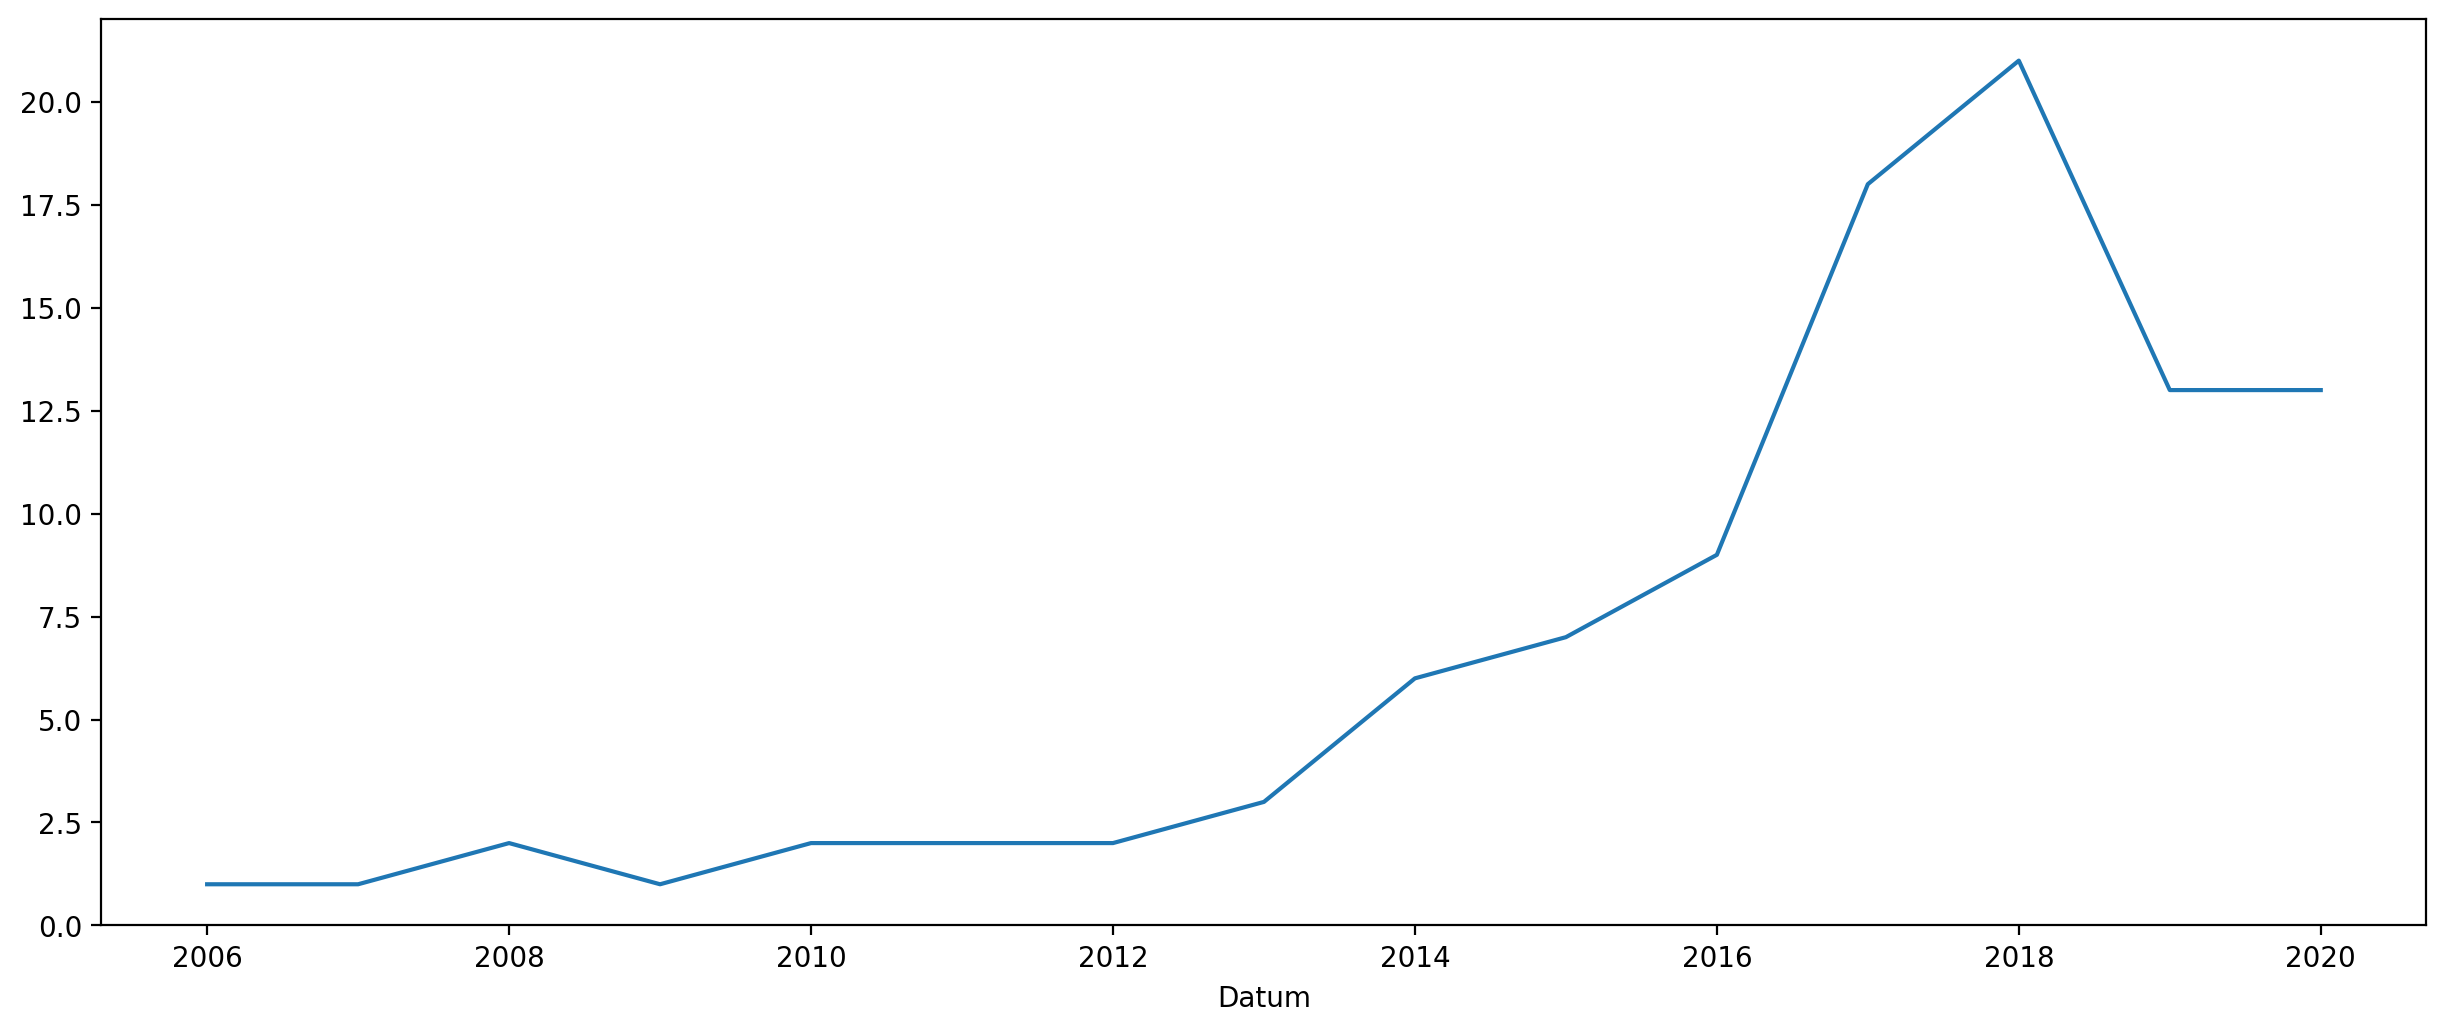

In [121]:
df[df["Company Name"]=="SpaceX"].groupby(df["Datum"].dt.year)[" Rocket"].count().plot()

# Classement des nations sur le nombre de décollages


<AxesSubplot:xlabel='Country'>

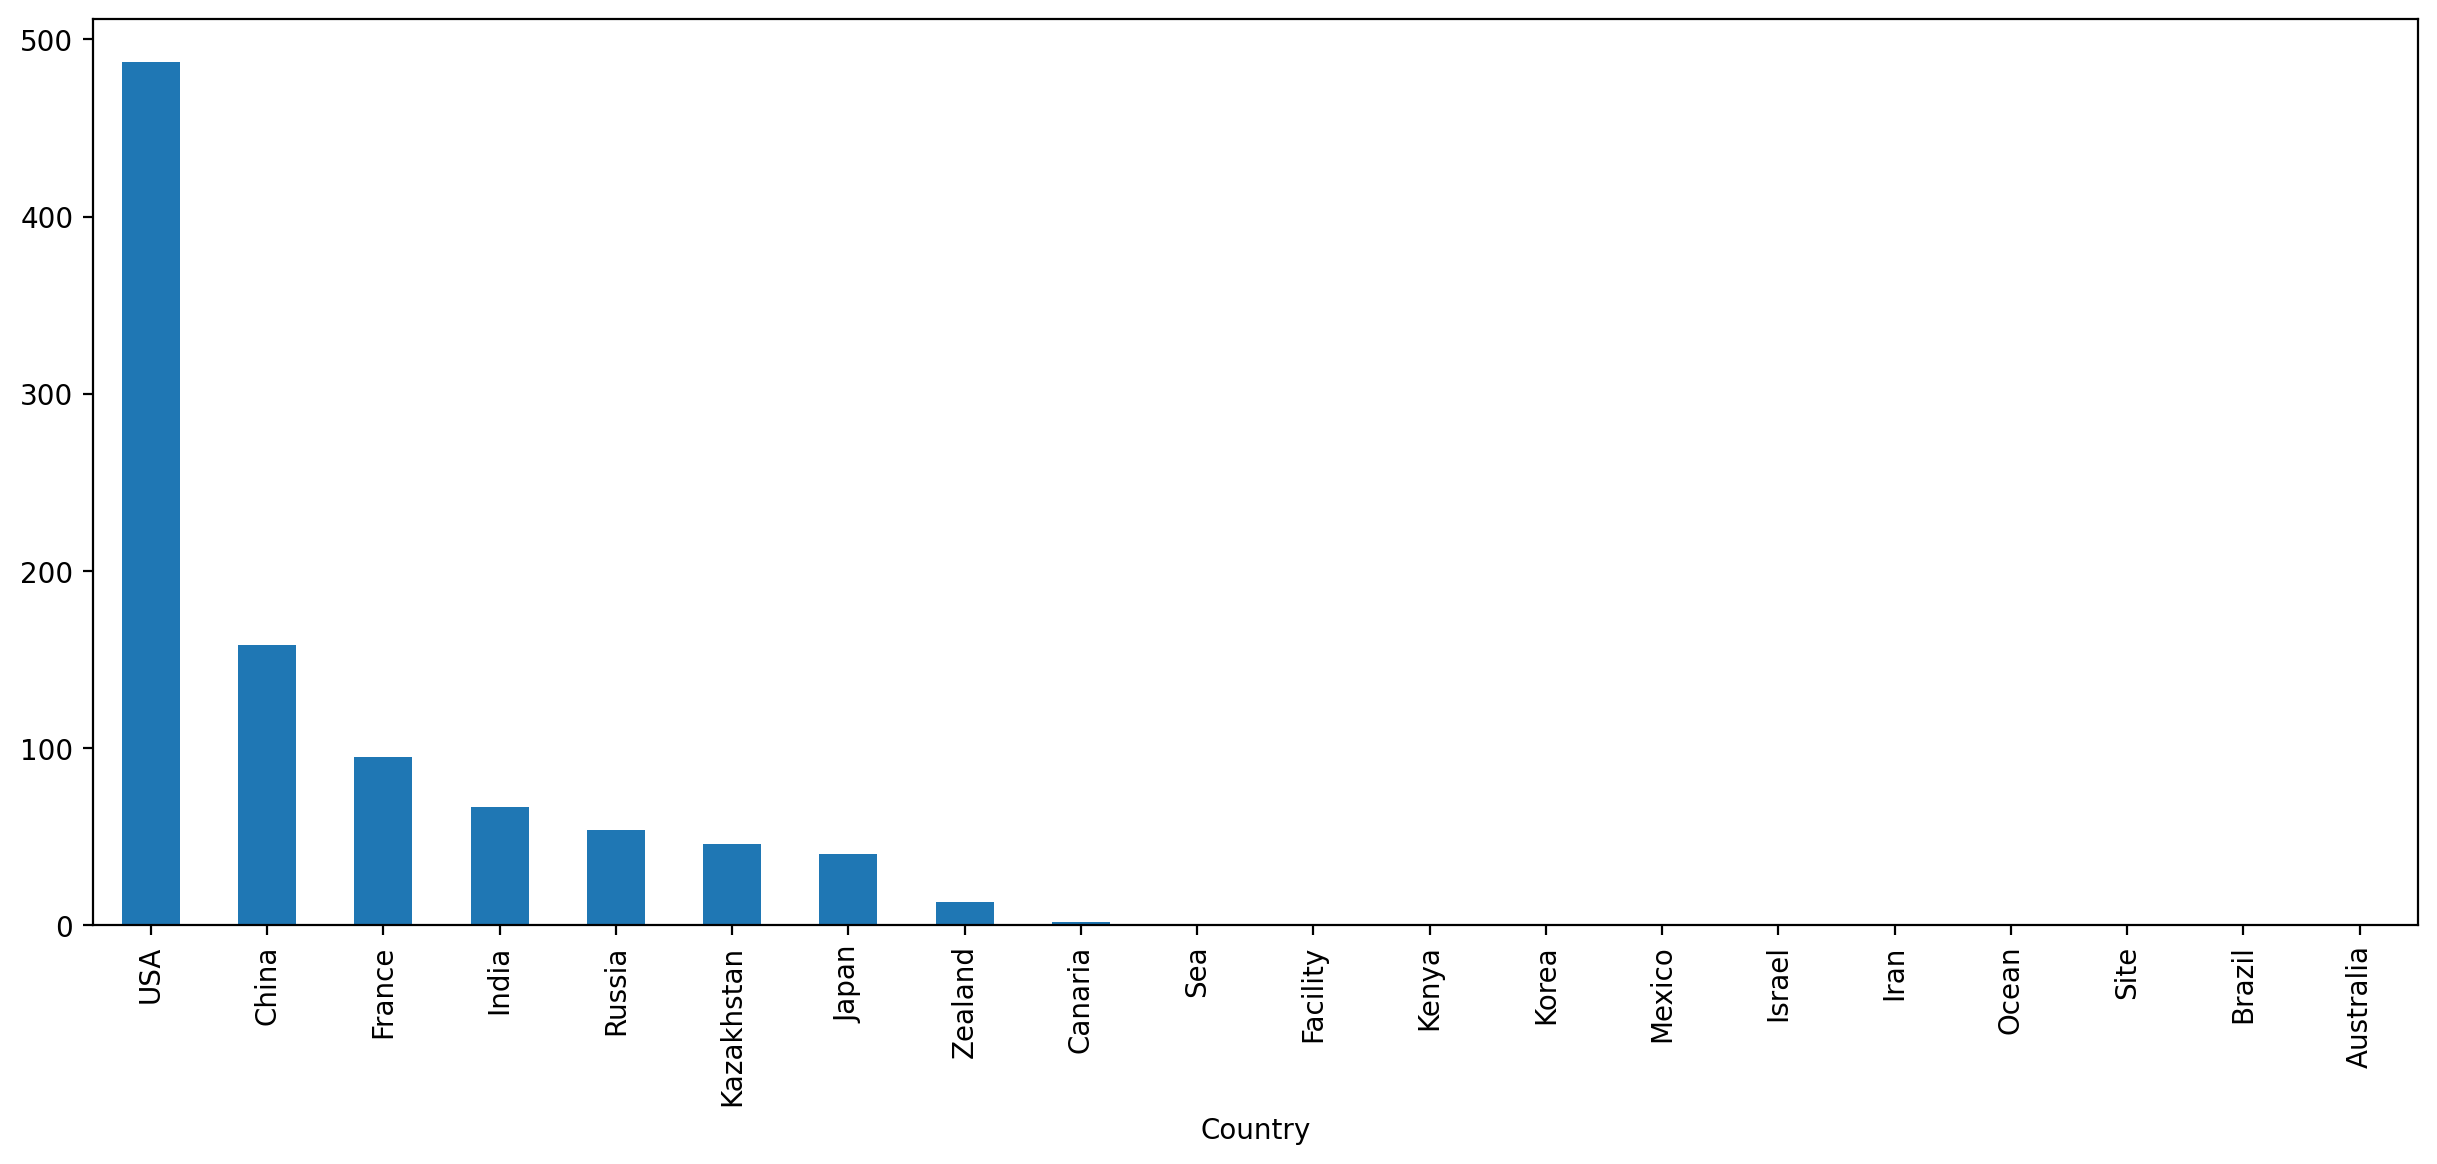

In [173]:
df.groupby("Country")[" Rocket"].count().sort_values(ascending=False).plot.bar()

# Visualisation du nombre de sites par pays

<AxesSubplot:ylabel='Sites'>

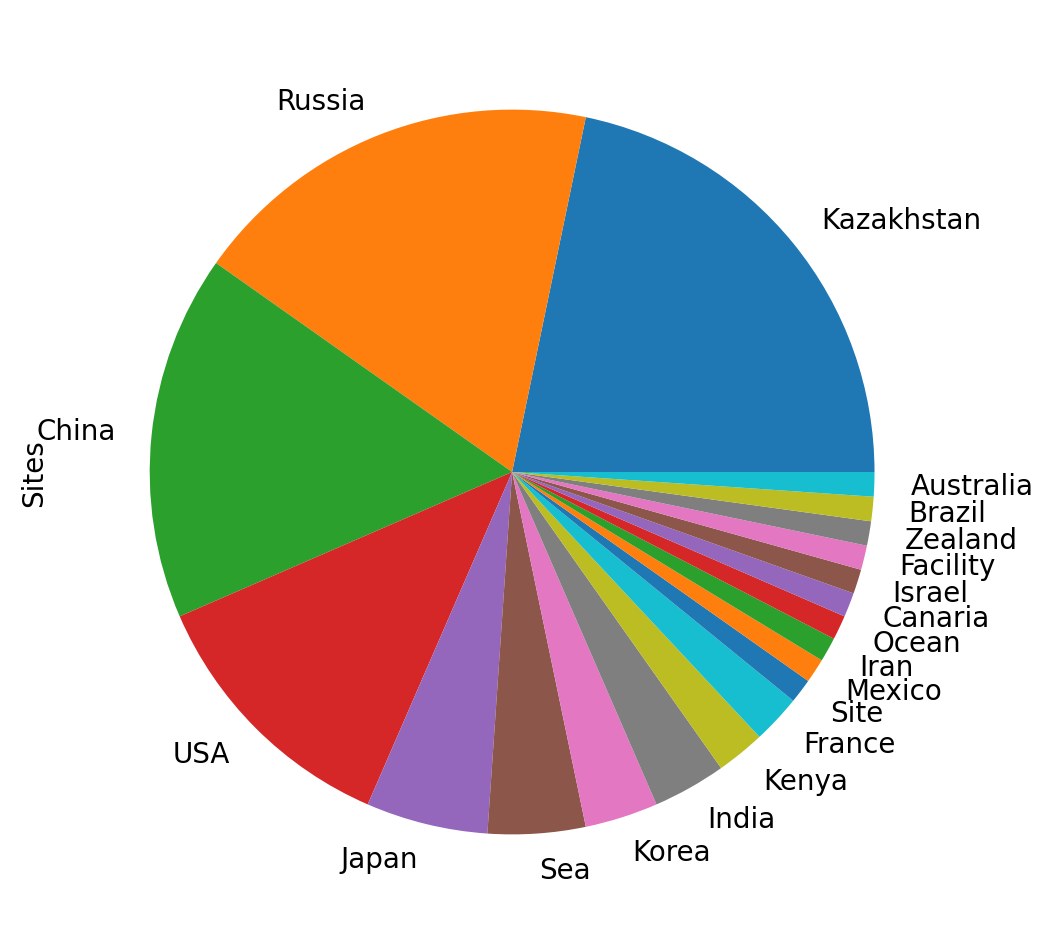

In [251]:
tmpdf = pd.DataFrame()
tmpdf["Sites"] = df["Location"].unique()
tmpdf["Sites"].apply(lambda x: x.split(" ")[-1]).value_counts().plot.pie()